 # Pràctica 4

In [2]:
# importem les llibreries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# carreguem les dades i primera ullada
lloguer = pd.read_csv('2021_lloguer_preu_trim.csv')
lloguer.head()


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [7]:
lloguer.info() # els tipus de dades i observem que el preu és object !!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [ ]:
lloguer.Preu.astype(float)  # no el podem converir investiguem perquè   '--'

In [15]:
lloguernet = lloguer[lloguer.Preu != '--']  # em guardo la inicial i a lloguer net poso només valors els sense '--'
lloguernet[lloguernet.Preu == '--'] # comprova que ja no en queden 

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu


In [16]:
lloguernet.Preu=lloguernet.Preu.astype(float)  # compte ! a no fer lloguernet=lloguernet.Preu.astype(float) només ens quedariem amb la columana preu 

C:\Users\vila_\AppData\Local\Temp\ipykernel_15564\1040521806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lloguernet.Preu=lloguernet.Preu.astype(float)


In [17]:
lloguernet.info() # ara sí

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 38.0+ KB


In [18]:
lloguernet = lloguernet[lloguernet.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'] # ens quedem només amb el preu per metre 2

In [20]:
lloguernet # ja tenim la taula neta

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [42]:
lloguernet.groupby('Nom_Districte')['Preu'].mean().index

Index(['Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts',
       'Nou Barris', 'Sant Andreu', 'Sant Martí', 'Sants-Montjuïc',
       'Sarrià-Sant Gervasi'],
      dtype='object', name='Nom_Districte')

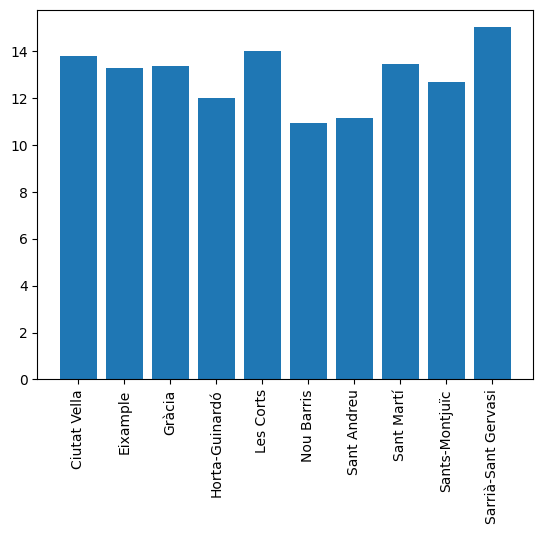

In [43]:
plt.bar(x=lloguernet.groupby('Nom_Districte')['Preu'].mean().index, height=lloguernet.groupby('Nom_Districte')['Preu'].mean())
plt.xticks(rotation=90)
plt.tittle('Lloguer mitjà per superfície (Euros/m2 mes)');  # crec que m'he complicat

C:\Users\vila_\AppData\Local\Temp\ipykernel_15564\3037834182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nom_Districte', y='Preu', data=lloguernet,palette='BuGn_d') #  el violinplot surt masssa apretat


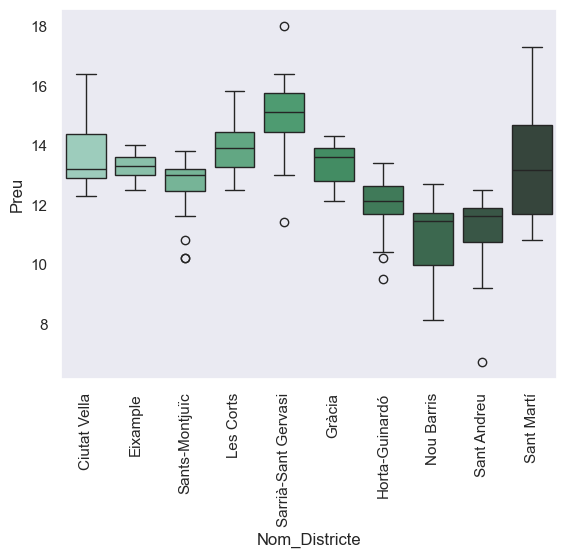

In [58]:
sns.set(style='dark')
sns.boxplot(x='Nom_Districte', y='Preu', data=lloguernet,palette='BuGn_d') #  el violinplot surt masssa apretat
plt.xticks(rotation=90);

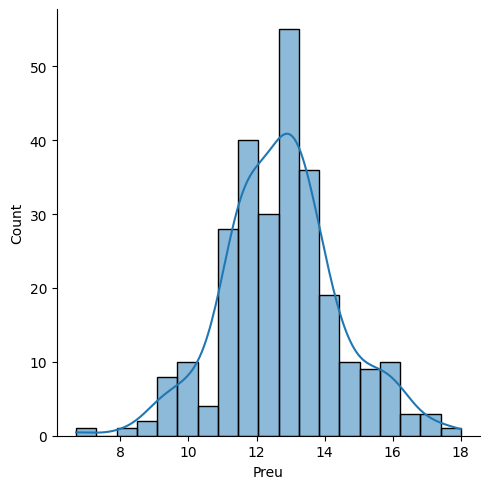

In [51]:
sns.displot(data=lloguernet, x='Preu', kde=True);